In [1]:
import os
import kagglehub
import numpy as np
from torchvision import transforms
from lib.lib import SignatureDataset
from sklearn.feature_extraction.image import img_to_graph

from scipy import sparse

In [2]:
def dataset_path():
    path = kagglehub.dataset_download("akashgundu/signature-verification-dataset")
    return os.path.join(path, 'extract')

def transform(**kwargs):
    return transforms.Compose([
        transforms.Grayscale(num_output_channels=kwargs['num_output_channels']),
        transforms.Resize(kwargs['resize']),
        transforms.ToTensor(),
    ])

dataset = SignatureDataset(
    root_dir=dataset_path(),
    transform=transform(num_output_channels=1, resize=(150, 150))
)

Loaded 14626 signature images (genuine + forged)


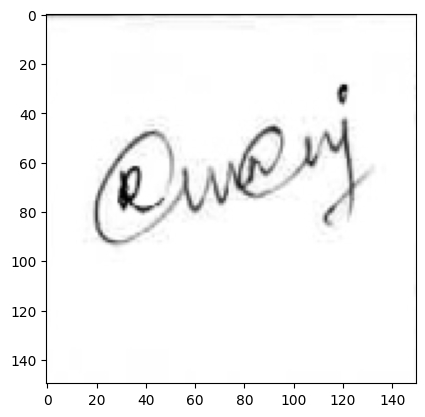

In [23]:
import matplotlib.pyplot as plt
import torch

img = list(dataset)[5]

# If tensor, convert to numpy and adjust channels
if isinstance(img, torch.Tensor):
    img = img.permute(1, 2, 0).numpy()  # C,H,W → H,W,C

plt.imshow(img, cmap='gray')
# plt.title(f"Label: {label}")
plt.show()

In [26]:
img = list(dataset)[5]
# img.numpy()

In [27]:
graph = img_to_graph(img, return_as=sparse.coo_matrix)
graph.data

array([0.00392157, 0.01960784, 0.02352941, ..., 0.99607843, 0.99607843,
       0.9843137 ], dtype=float32)

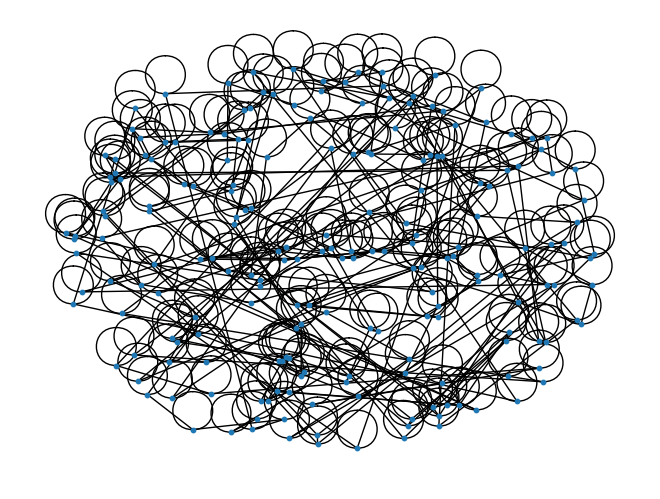

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_scipy_sparse_array(graph)
nx.draw(G.subgraph(list(G.nodes)[:200]), node_size=10)
plt.show()
# print(G.nodes)
# print(G.edges)

In [6]:
from torch.utils.data import random_split
import torch

total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size
train_dataset, val_dataset = random_split(
    dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)
print(f"Dataset sizes - Train: {train_size}, Validation: {val_size}")

Dataset sizes - Train: 11700, Validation: 2926


In [6]:
from tqdm import tqdm

train_graph = []
val_graph = []

# Convert training dataset
for t in tqdm(train_dataset, desc="Train Graphs"):
    t_graph = img_to_graph(t, return_as=np.ndarray)
    train_graph.append(t_graph)

# Convert validation dataset
for v in tqdm(val_dataset, desc="Val Graphs"):
    v_graph = img_to_graph(v, return_as=np.ndarray)
    val_graph.append(v_graph)

print("Train graphs:", len(train_graph))
print("Val graphs:", len(val_graph))

Train Graphs:   0%|                                                                             | 0/11700 [00:00<?, ?it/s]


MemoryError: Unable to allocate 1.89 GiB for an array with shape (22500, 22500) and data type float32